In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv('/content/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [9]:
df.duplicated().sum()

0

In [11]:
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [14]:
df=df.drop(df.index[[40,49]],axis=0).reset_index()
df

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


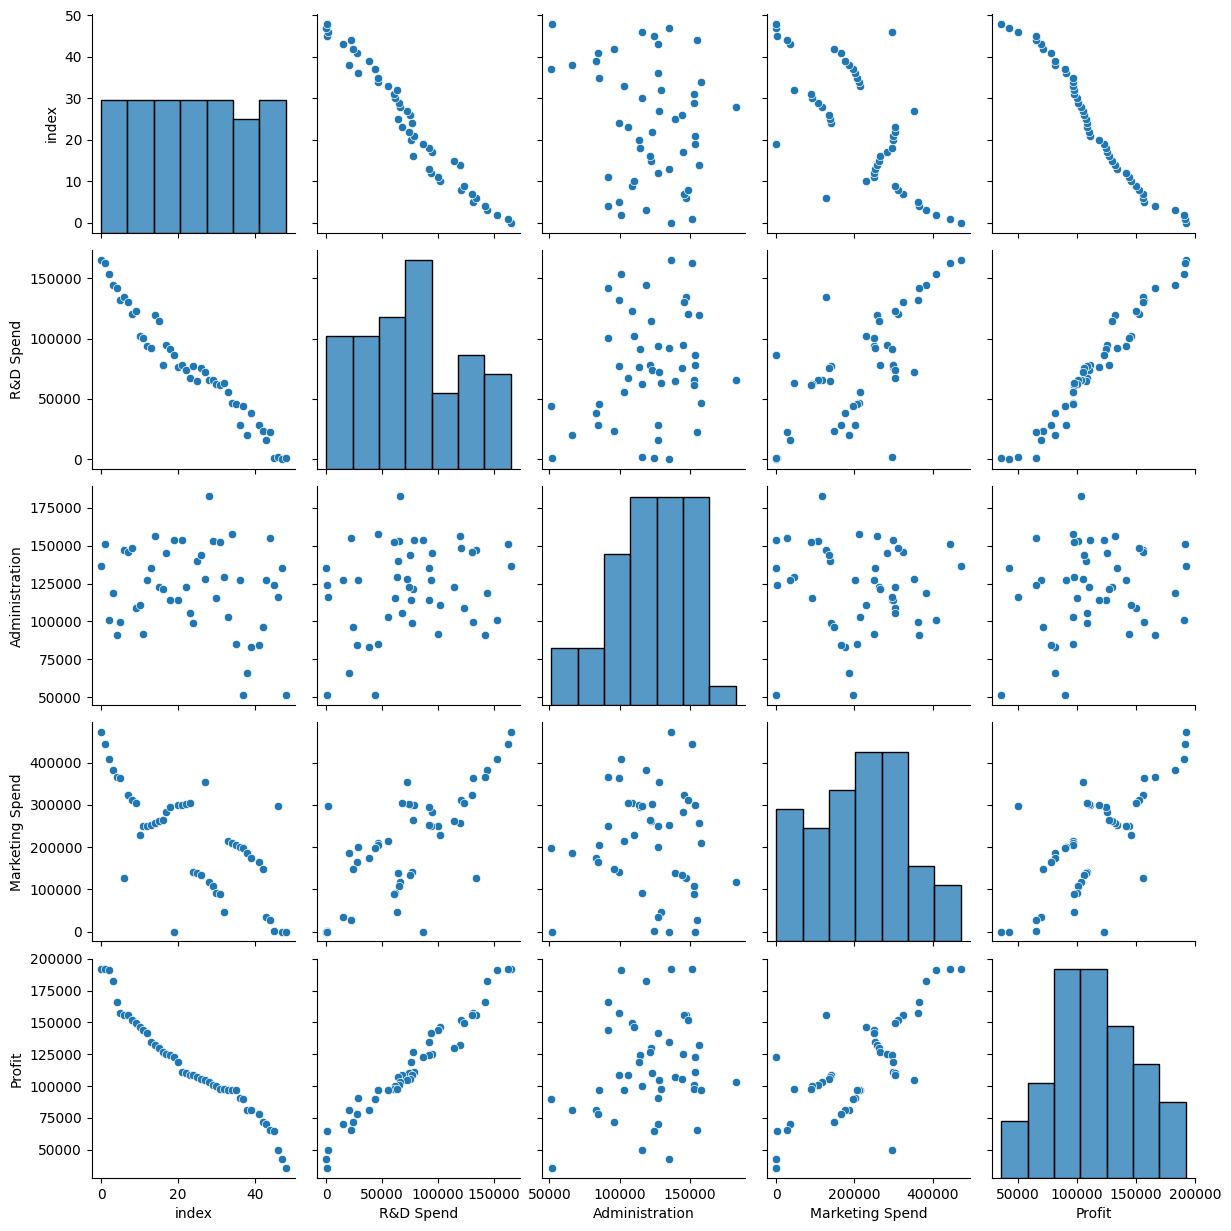

In [15]:
# Create the scatterplot matrix with histograms
sns.pairplot(df)

# Show the plot
plt.show()

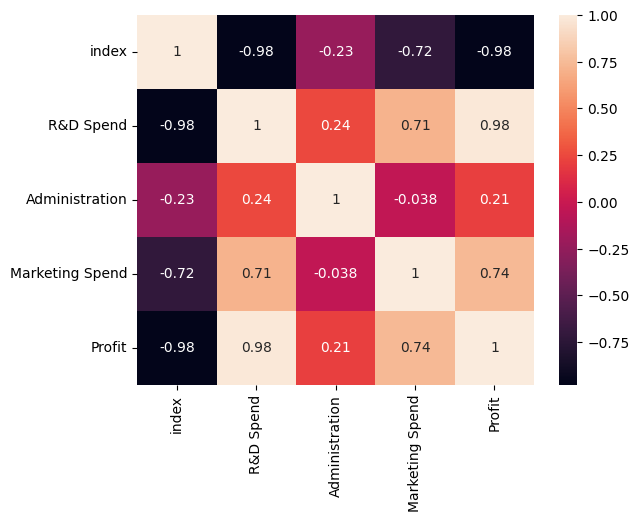

In [17]:
#heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

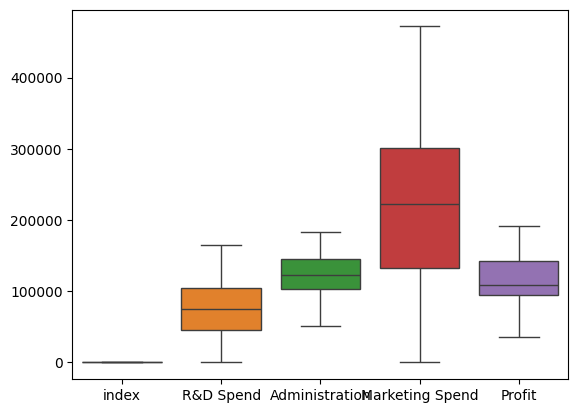

In [62]:
#boxplot
sns.boxplot(data=df)
plt.show()

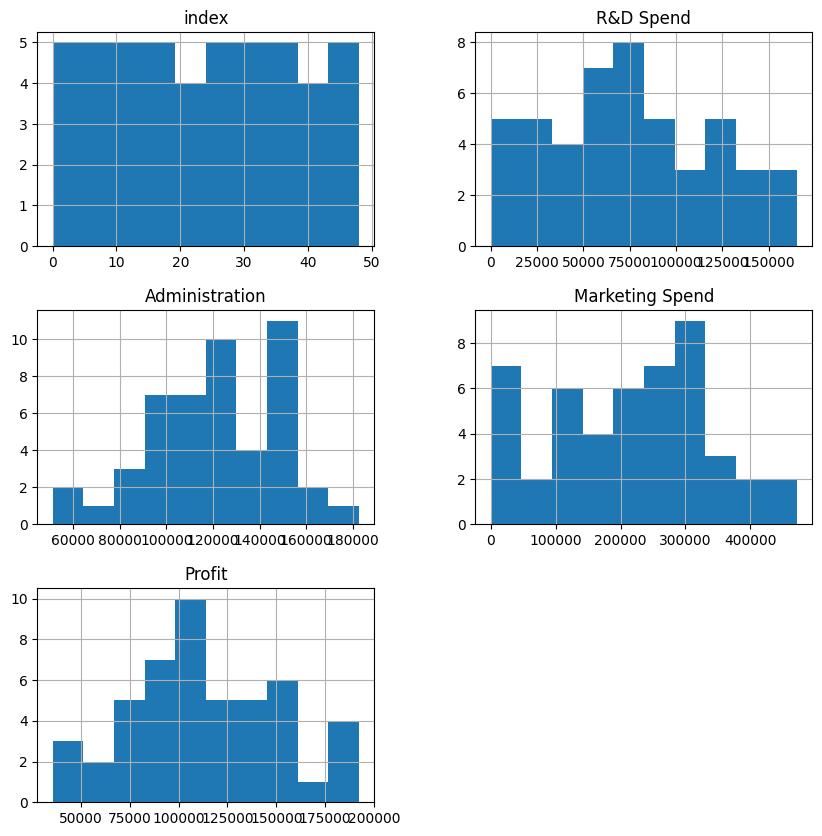

In [63]:
#hist
df.hist(figsize=(10,10))
plt.show()

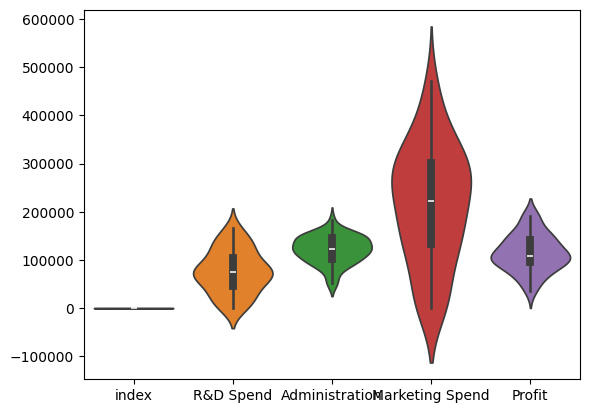

In [64]:
#violin
sns.violinplot(data=df)
plt.show()

In [67]:
#Outlier Handling
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    print(mean, std) # Print mean and std inside the function

# Call the function with your data to calculate and print mean, std
detect_outliers_zscore(df['Profit']) # Example: Assuming you want to analyze 'Profit' column

114743.971875 37813.347671658856


In [20]:
#Preparing a model
import statsmodels.formula.api as smf
model=smf.ols('Profit~Administration+Q("Marketing Spend")+C(State)',data=df).fit()


In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept               1.537458
C(State)[T.Florida]    -0.665448
C(State)[T.New York]   -0.116197
Administration          2.461493
Q("Marketing Spend")    7.828822
dtype: float64 
 Intercept               1.315080e-01
C(State)[T.Florida]     5.093181e-01
C(State)[T.New York]    9.080376e-01
Administration          1.792397e-02
Q("Marketing Spend")    8.296298e-10
dtype: float64


In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6076082507843532, 0.5711066927177815)

In [28]:
# Simple Linear Regression Models
ml_R = smf.ols('Profit~Q("Marketing Spend")',data = df).fit()
sl_R = smf.ols('Profit~Q("R&D Spend")',data = df).fit()
ml_M = smf.ols('Profit~Administration+Q("Marketing Spend")',data = df).fit()
ml_A = smf.ols('Profit~Administration',data = df).fit()
for m in [ml_R,sl_R,ml_M,ml_A]:
    print(m.rsquared)

0.5480830621971162
0.956640161530581
0.6028947154745621
0.04233701398268319


In [29]:
#calculating vif
rsq_r = smf.ols('Profit~Q("R&D Spend")',data=df).fit().rsquared
vif_r = 1/(1-rsq_r)
print('VIF for R&D Spend is',vif_r)

VIF for R&D Spend is 23.062816544053387


In [30]:
rsq_m = smf.ols('Profit~Q("Marketing Spend")',data=df).fit().rsquared
vif_m = 1/(1-rsq_m)
print('VIF for Marketing Spend is',vif_m)

VIF for Marketing Spend is 2.212796017033064


In [32]:
rsq_A= smf.ols('Profit~Administration',data=df).fit().rsquared
vif_A = 1/(1-rsq_A)
print('VIF for Administration is',vif_A)

VIF for Administration is 1.0442086773748585


In [33]:
# Storing vif values in a data frame
d1 = {'Variables':['Q("R&D Spend")','Q("Marketing Spend")','Administration'],'VIF':[vif_r,vif_m,vif_A]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,"Q(""R&D Spend"")",23.062817
1,"Q(""Marketing Spend"")",2.212796
2,Administration,1.044209


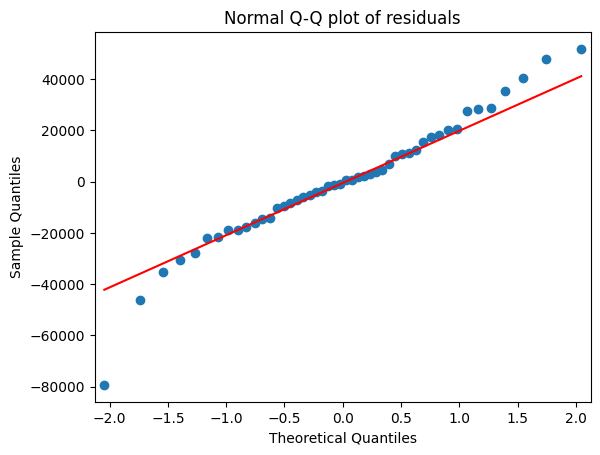

In [34]:
# Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


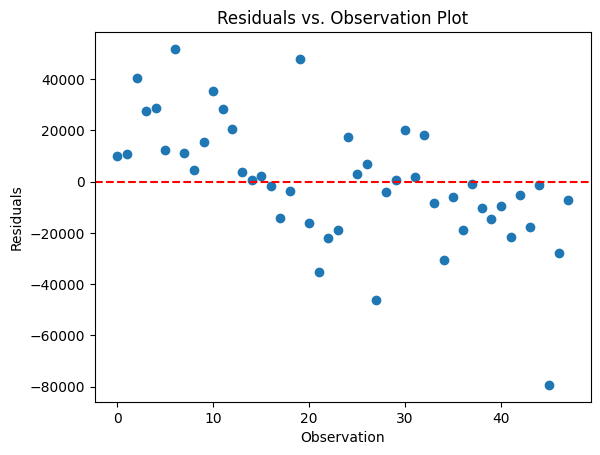

In [36]:
# Assuming 'model' is your fitted OLS model
# Get the residuals
residuals = model.resid

# Create a DataFrame with the residuals
residuals_df = pd.DataFrame({'Residuals': residuals})
plt.scatter(residuals_df.index, residuals_df['Residuals'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Residuals vs. Observation Plot')
plt.show()


In [37]:
list(np.where(model.resid>10))

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 19,
        24, 25, 26, 29, 30, 31, 32])]

In [38]:
## Residual Plot for Homoscedasticity
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

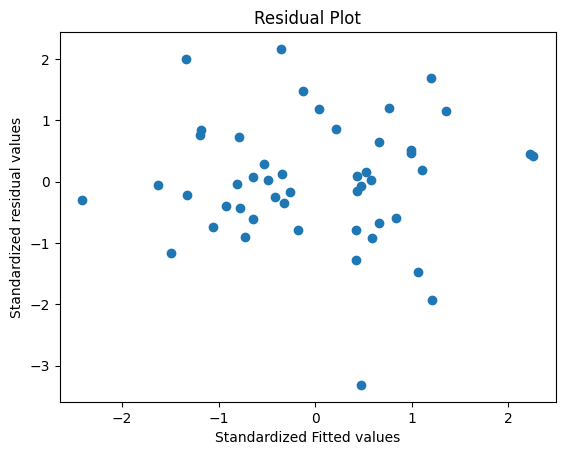

In [39]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

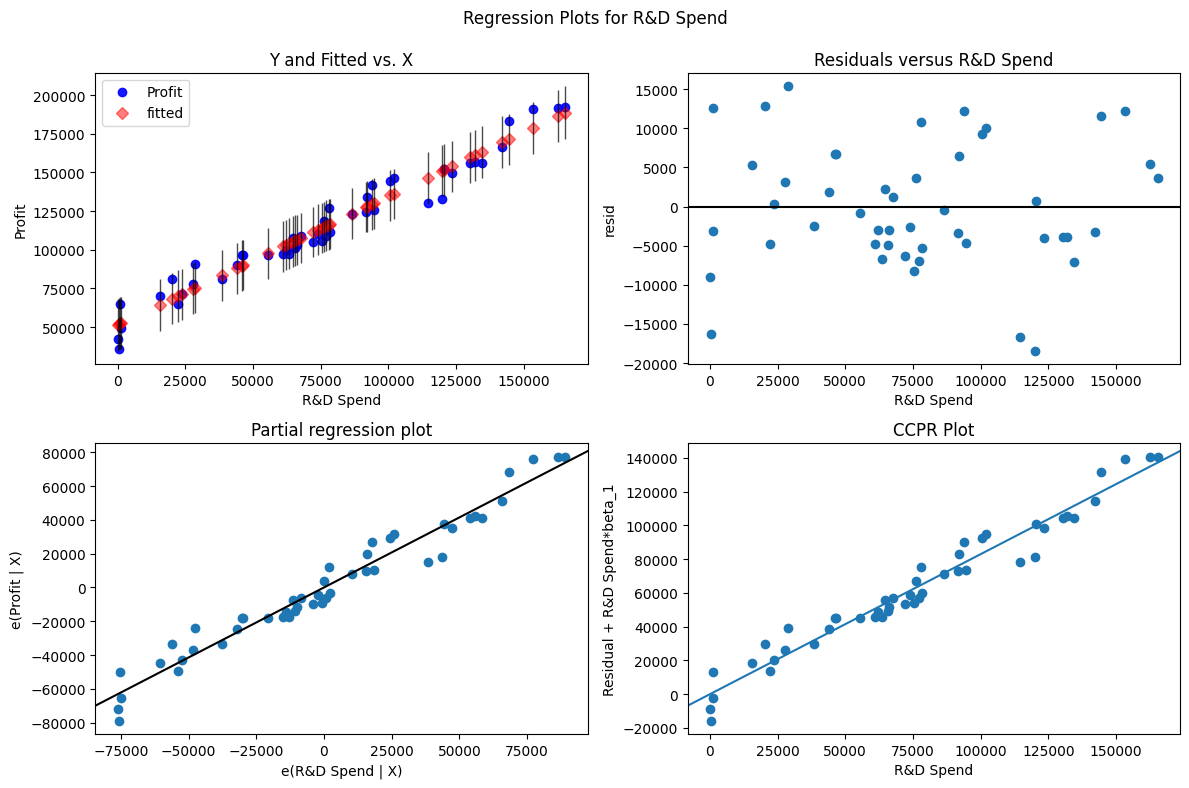

In [43]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12, 8))  # Create the figure first
exog_name='R&D Spend' # Changed from 'Q("R&D Spend")' to 'R&D Spend'
exog = sm.add_constant(df[exog_name])
model = sm.OLS(df['Profit'], exog).fit()
fig = sm.graphics.plot_regress_exog(model, exog_name, fig=fig)
plt.show()

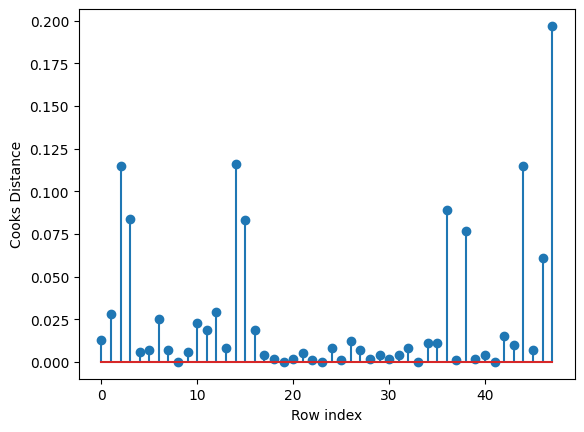

In [45]:
## Detecting Influencers/Outliers
# prompt: ## Detecting Influencers/Outliers
# cook's distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


In [46]:
#index and value of influencer where c is more than .5
np.argmax(c) , np.max(c)

(47, 0.19725398348954812)

In [48]:
## High Influence points
df[df.index.isin([26])]

,index,R&D Spend,Administration,Marketing Spend,State,Profit
26,26,75328.87,144135.98,134050.07,Florida,105733.54


In [49]:
#Splitting the dataset into the Training set and Test set¶
x=df.drop(columns=['Profit','State'],axis=1)
y=df['Profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)




In [50]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [51]:
#Predicting the Test set results

y_pred=regressor.predict(x_test)
y_pred

array([100688.52581553, 170305.20551052, 109235.24601681,  98501.65867665,
        95481.39303014,  85322.47472822,  87900.39379962,  72138.76285182,
       159583.61223766, 143115.95653259])

In [52]:
#R2 SCORE FUNCTION¶
r2_score(y_test,y_pred)

0.977370011445921

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [55]:
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5) # Change to KNeighborsRegressor
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [58]:
# Make predictions on the test data
y_pred = knn.predict(x_test)


In [60]:
r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('MSE:',mse)
print('RMSE:',np.sqrt(mse))


MSE: 169792985.5261608
RMSE: 13030.46374946651


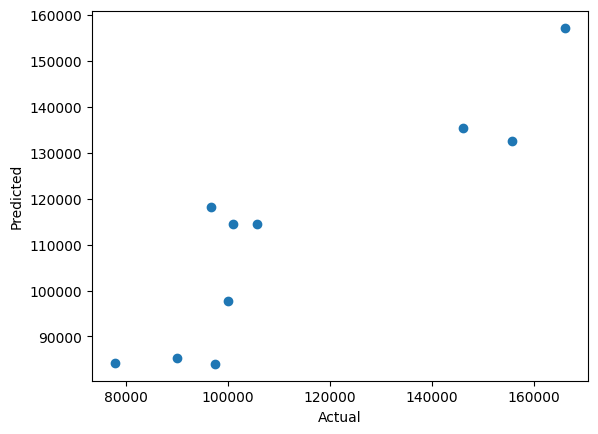

In [61]:
#plot
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [69]:
#Create a GitHub repository:
!pip freeze > requirements.txt